# Determining the Key Factors for Developing a Top Striker in FIFA

<img src="https://cdn02.nintendo-europe.com/media/images/10_share_images/games_15/nintendo_switch_4/H2x1_NSwitch_EASportsFifa19.jpg">

## Problem 
The purpose of this Kaggle Notebook is to find **the top traits that have the most influence in the Finishing score of a footballer** so that players can best invest their skill points.

## Solution
In order to solve this, we would make use of machine learning python libraries (numpy, pandas,and sklearn) to make a simple exploratory data analysis and visualization. Later, we would make a linear regression model double checking its acurracy with key metrics and finalize with the testing of our model with some values of the found traits.

## Importing Packages and Modules
### Visualization 
* Matplotlib
* Seaborn

### Data Processing
* Numpy
* Pandas

### Regression
* Sklearn

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa19/data.csv


## Exploratory Analysis

Importing the data and finding about the columns that it has as well as the number of rows and columns

In [2]:
ds= pd.read_csv('../input/fifa19/data.csv')
ds.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [3]:
ds.shape

(18207, 89)

Visualizing the top 5 rows of the dataset 

In [4]:
ds.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


Selecting the traits that most likely have an influence in the Finishing score and using them to filter the dataset

In [5]:
columnas=['Finishing','Volleys','Dribbling','LongShots','ShotPower','Positioning']

In [6]:
df=pd.DataFrame(ds, columns=columnas)
df.head()

,Finishing,Volleys,Dribbling,LongShots,ShotPower,Positioning
0,95.0,86.0,97.0,94.0,85.0,94.0
1,94.0,87.0,88.0,93.0,95.0,95.0
2,87.0,84.0,96.0,82.0,80.0,89.0
3,13.0,13.0,18.0,12.0,31.0,12.0
4,82.0,82.0,86.0,91.0,91.0,87.0


Now, it's time to find and drop the missing values

In [7]:
df.isnull().sum()

Finishing      48
Volleys        48
Dribbling      48
LongShots      48
ShotPower      48
Positioning    48
dtype: int64

In [8]:
df.dropna(inplace=True)

After filtering out the missing values, we do a summarization of the dataset and a correlation table of our selected traits

In [9]:
df.describe()

,Finishing,Volleys,Dribbling,LongShots,ShotPower,Positioning
count,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,45.550911,42.909026,55.371001,47.109973,55.460047,49.958478
std,19.525820,17.694408,18.910371,19.260524,17.237958,19.529036
min,2.000000,4.000000,4.000000,3.000000,2.000000,2.000000
25%,30.000000,30.000000,49.000000,33.000000,45.000000,38.000000
50%,49.000000,44.000000,61.000000,51.000000,59.000000,55.000000
75%,62.000000,57.000000,68.000000,62.000000,68.000000,64.000000
max,95.000000,90.000000,97.000000,94.000000,95.000000,95.000000


In [10]:
df.corr()

,Finishing,Volleys,Dribbling,LongShots,ShotPower,Positioning
Finishing,1.000000,0.882675,0.824337,0.877834,0.815472,0.888790
Volleys,0.882675,1.000000,0.809639,0.868253,0.832479,0.848333
Dribbling,0.824337,0.809639,1.000000,0.843619,0.804732,0.896932
LongShots,0.877834,0.868253,0.843619,1.000000,0.889254,0.861080
ShotPower,0.815472,0.832479,0.804732,0.889254,1.000000,0.809068
Positioning,0.888790,0.848333,0.896932,0.861080,0.809068,1.000000


Plotting the correlation values and a pairplot of the traits that interests us

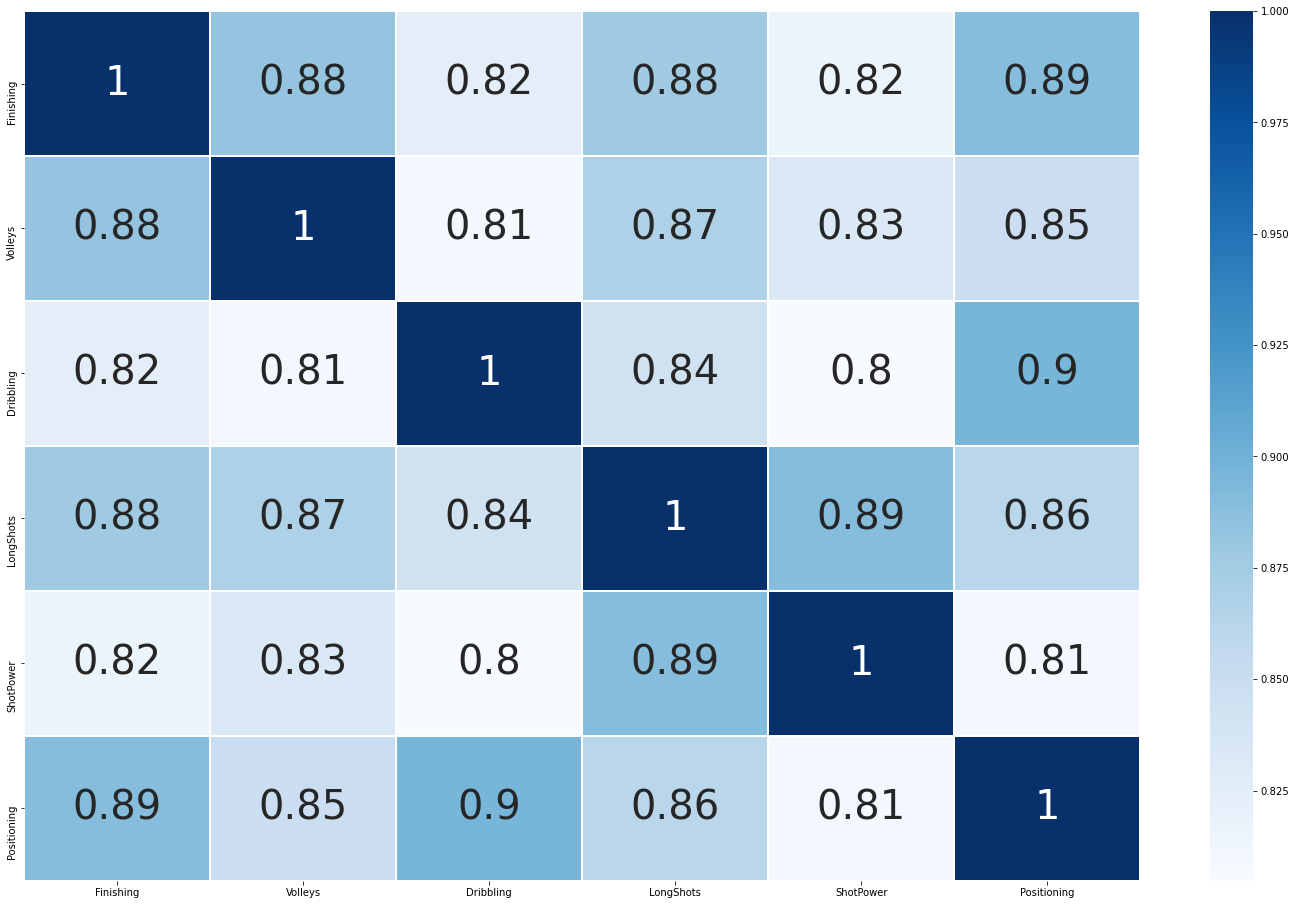

In [11]:
df_corr=df.corr()
plt.rcParams['figure.figsize']=(25,16)
sns.heatmap(df_corr, linewidths=.5, cmap="Blues",annot=True, annot_kws={'size':40})

We can see how our data it's well suited for a linear regression model

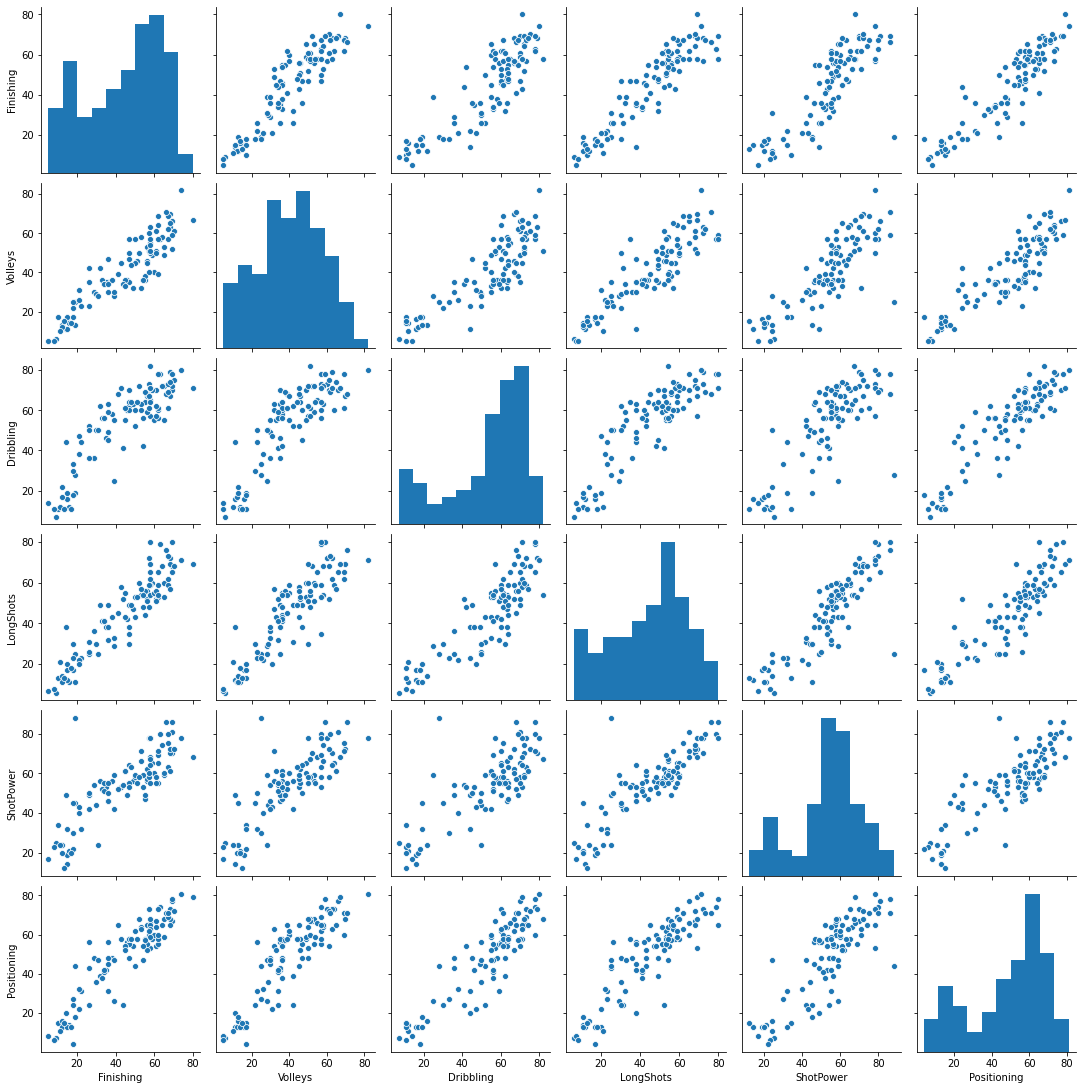

In [12]:
sns.pairplot(df.sample(100))

## Modeling

In [13]:
df.head()

,Finishing,Volleys,Dribbling,LongShots,ShotPower,Positioning
0,95.0,86.0,97.0,94.0,85.0,94.0
1,94.0,87.0,88.0,93.0,95.0,95.0
2,87.0,84.0,96.0,82.0,80.0,89.0
3,13.0,13.0,18.0,12.0,31.0,12.0
4,82.0,82.0,86.0,91.0,91.0,87.0


Dividing our features between dependent (our target) and independent variables

In [14]:
x=df.drop(['Finishing'],axis=1).values
y=df['Finishing']
print(x.shape)
print(y.shape)

(18159, 5)
(18159,)


In [15]:
print(x)

[[86. 97. 94. 85. 94.]
 [87. 88. 93. 95. 95.]
 [84. 96. 82. 80. 89.]
 ...
 [38. 45. 45. 45. 48.]
 [40. 51. 34. 64. 44.]
 [30. 43. 32. 43. 34.]]


In [16]:
print(y)

0        95.0
1        94.0
2        87.0
3        13.0
4        82.0
         ... 
18202    38.0
18203    52.0
18204    40.0
18205    50.0
18206    34.0
Name: Finishing, Length: 18159, dtype: float64


Further dividing the values of our dataset into training and testing groups

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.80, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3631, 5)
(14528, 5)
(3631,)
(14528,)


Creating our model by fitting the training datasets in the LinearRegression function and saving the predictions using the independent features of the training dataset

In [18]:
lm = LinearRegression(fit_intercept = True)
lm.fit(X_train, y_train)

y_pred = lm.predict(X_train)

Printing key metrics to find the accuracy of our model

In [19]:
#print(lm.score(X_train, y_train))
print("The R^2 score of the training dataset is:",r2_score(y_train, y_pred))
print("The R^2 score of the testing dataset is:",r2_score(y_test, lm.predict(X_test)))
print("The Mean Square Error (MSE) for the testing dataset is:",sqrt(mean_squared_error(y_test, lm.predict(X_test))))
print("The Mean Abosulte Error (MAE) for the testing dataset is:",mean_absolute_error(y_test, lm.predict(X_test)))
print("The Coefficients of the Indepent Variables are:",lm.coef_)
print("The Intercept is:",lm.intercept_)

The R^2 score of the training dataset is: 0.8590253748837922
The R^2 score of the testing dataset is: 0.8626741025898564
The Mean Square Error (MSE) for the testing dataset is: 7.230108682484362
The Mean Abosulte Error (MAE) for the testing dataset is: 5.534577865136767
The Coefficients of the Indepent Variables are: [ 0.3724145  -0.0307577   0.26481509 -0.01803727  0.4165156 ]
The Intercept is: -0.918976478896063


Plotting our Predicted Values vs True Values with the R^2 Score

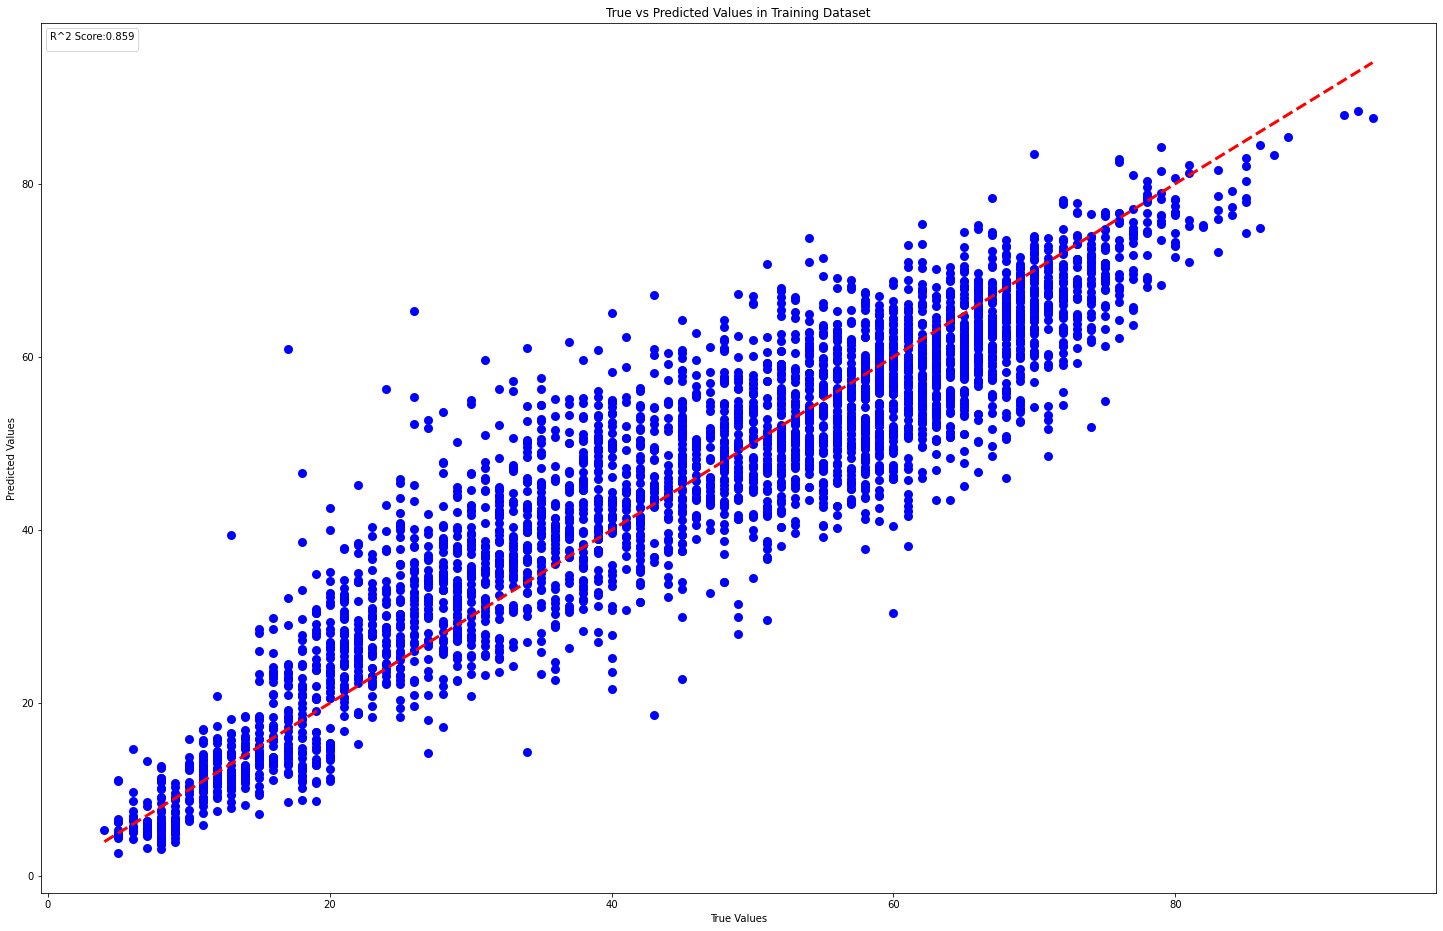

In [20]:
plt.scatter(y_train, y_pred, color='blue', linewidth=3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.legend(title="R^2 Score:0.859", loc="upper left")
plt.title("True vs Predicted Values in Training Dataset")
plt.show()

Actual vs Residual Values

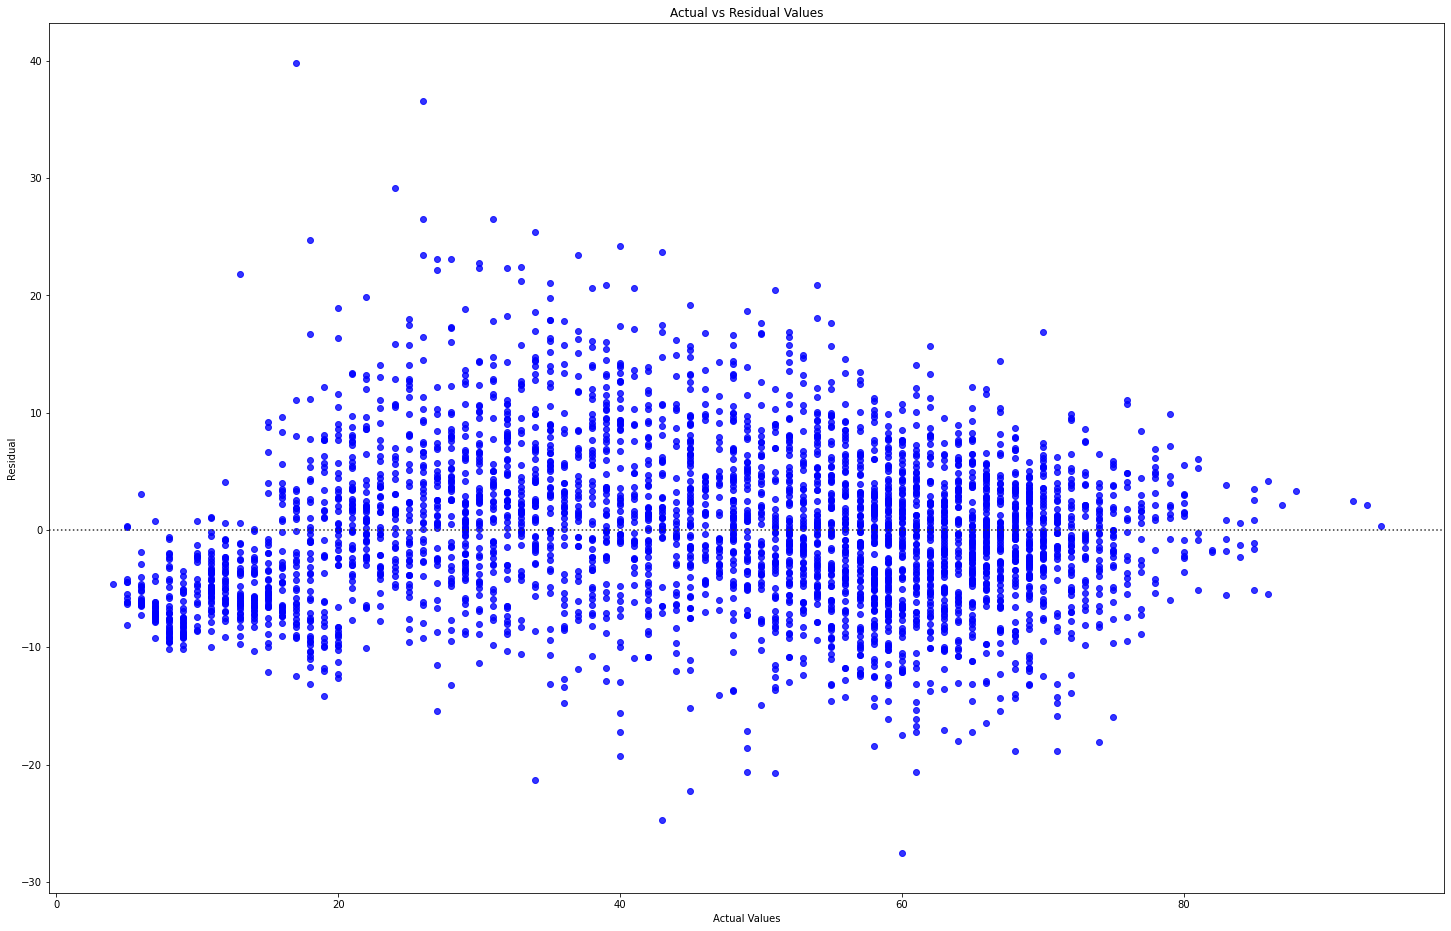

In [21]:
sns.residplot(y_train, y_pred, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Residual")
plt.title("Actual vs Residual Values")
plt.show()

## Using our Model

Filtering out the Finishing trait

In [22]:
x2=df.drop(['Finishing'],axis=1)
x2.columns

Index(['Volleys', 'Dribbling', 'LongShots', 'ShotPower', 'Positioning'], dtype='object')

Finding the coefficients of our selected traits 

In [23]:
Coeff = lm.coef_
Coeff.shape
Coeff = Coeff.reshape(-1,5)
Coeff_df=pd.DataFrame(Coeff,columns=['Volleys', 'Dribbling', 'LongShots', 'ShotPower', 'Positioning'])
Coeff_df

,Volleys,Dribbling,LongShots,ShotPower,Positioning
0,0.372415,-0.030758,0.264815,-0.018037,0.416516


Finally, we put some values on our key traits to predict the Finishing score

In [24]:
Volleys=80
Dribbling=80
LongShots=75
ShotPower=50
Positioning=99

prediction=(lm.intercept_)+(Coeff_df['Volleys'].values[0]*Volleys)+(Coeff_df['Dribbling'].values[0]*Dribbling)+(Coeff_df['LongShots'].values[0]*LongShots)+(Coeff_df['ShotPower'].values[0]*ShotPower)+(Coeff_df['Positioning'].values[0]*Positioning)
print("The predicted Finishing score is:",prediction)

The predicted Finishing score is: 86.60787997936524
